In [137]:
%matplotlib inline
import matplotlib as mpl
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbs
import json
sbs.set(context='notebook', style='darkgrid', font_scale=1.5, palette='cubehelix', rc={"figure.figsize": (16, 8)})

In [138]:
path1 = '/Users/fergusbarratt/Downloads/usagov_bitly_data2013-05-17-1368832207'
path2 = '/Users/fergusbarratt/Downloads/usagov_bitly_data2013-05-17-1368825005'
records = [json.loads(line) for line in open(path1)] + [json.loads(line) for line in open(path2)]
record_data = pd.Series([record['ll'] for record in records if 'll' in record.keys()])
records = pd.DataFrame(records)

In [139]:
dat = record_data.as_matrix()

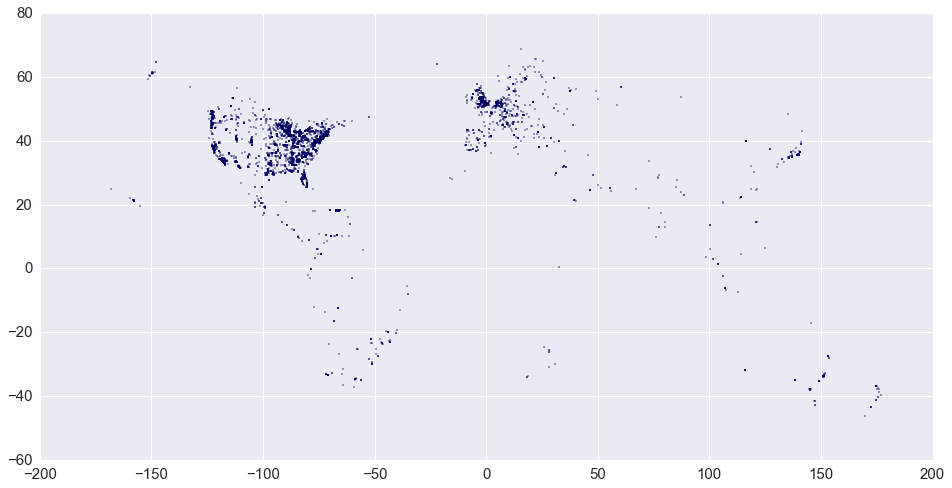

In [140]:
plt.scatter(np.array(list(dat[:]), dtype=np.float)[:, 1], np.array(list(dat[:]), dtype=np.float)[:, 0], s=1)

In [141]:
clean_rec = records.fillna('Missing')

In [142]:
clean_tz = clean_rec['tz']
clean_tz[clean_tz == ''] = 'Unknown'
tz_counts = clean_tz.value_counts()

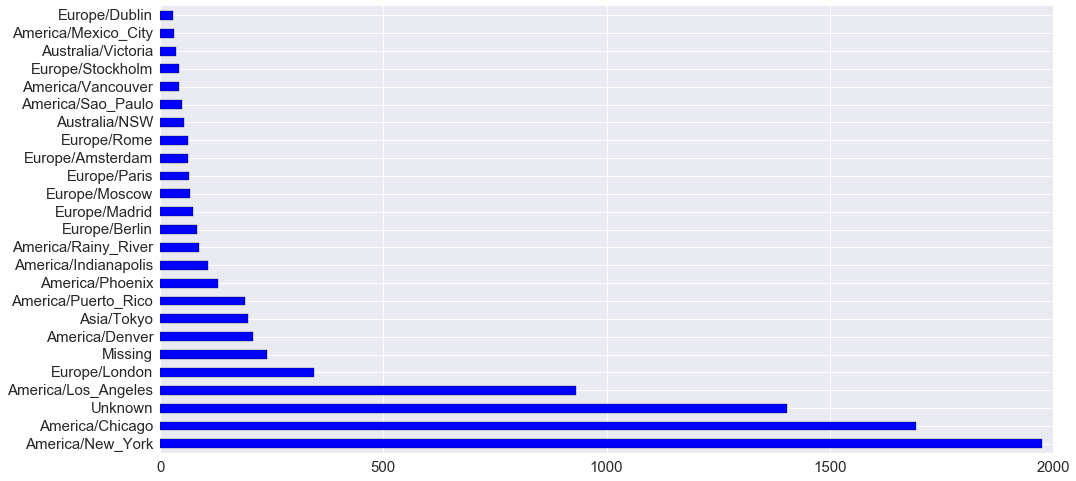

In [143]:
tz_counts[:25].plot(kind='barh', rot=0)

In [144]:
results = pd.Series([x.split()[0] for x in records.a.dropna()])
rec = records[records.a.notnull()]
operating_system = np.where(rec['a'].str.contains('Windows'), 'Windows', 'Not Windows')

In [145]:
by_tz = rec.groupby(['tz', operating_system])
agg_counts = by_tz.size().unstack().fillna(0)

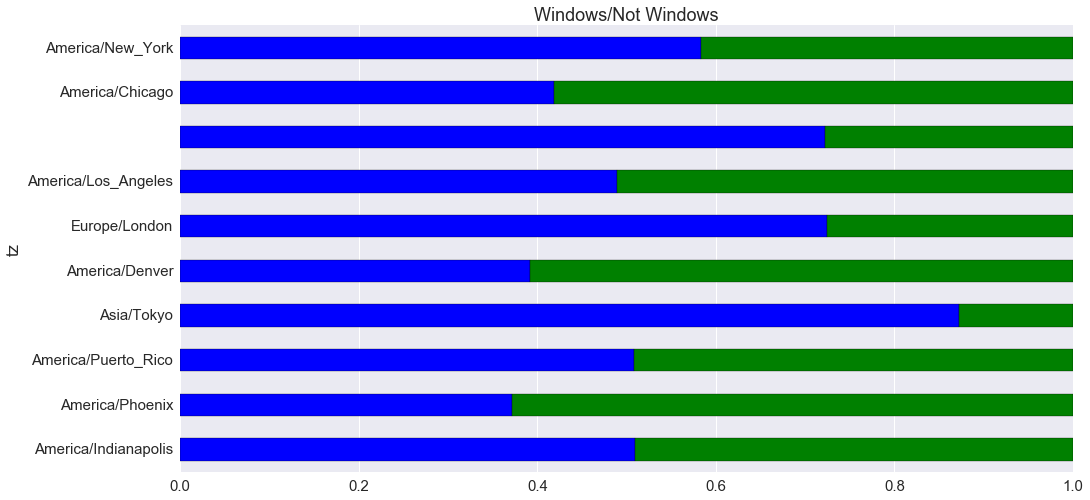

In [146]:
indexer = agg_counts.sum(1).argsort()
count_subset = agg_counts.take(indexer)[-10:]
# count_subset.plot(kind='barh', stacked=True)
normed_subset = count_subset.div(count_subset.sum(1), axis=0)
normed_subset.plot(kind='barh', stacked=True, legend=False, title='Windows/Not Windows')